In [1]:
import pandas as pd
import numpy as np

## Import User and Artist Dataset

In [2]:
#Reading the 'plays' dataset, turning all items into integers
users = pd.DataFrame(np.array([i.strip().split("\t") for i in open('lastfm_data/user_artists.dat', 'r', encoding='latin-1').readlines()]),
                       columns = ['userID', 'artistID', 'plays'])
users = users.drop(users.index[0])
users = users.apply(pd.to_numeric)
users.head()

#Reading 'artists' dataset, splitting the first column into three columns on the newline, turning artistid into int
artists = pd.DataFrame(open('lastfm_data/artists.dat', 'r',  encoding='latin-1').readlines())
artists = pd.DataFrame(artists[0].str.split("\t").values.tolist(),columns = ['artistID', 'name', 'url', 'pictureURL'])
artists = artists.drop(artists.index[0])
artists = artists.drop(columns=['pictureURL'])
artists['artistID'] = artists['artistID'].apply(pd.to_numeric)


In [3]:
print(users.head())
print()
print(artists.head())

   userID  artistID  plays
1       2        51  13883
2       2        52  11690
3       2        53  11351
4       2        54  10300
5       2        55   8983

   artistID               name                                         url
1         1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER
2         2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams
3         3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest
4         4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois
5         5        Bella Morte        http://www.last.fm/music/Bella+Morte


In [4]:
users_artists = pd.merge(users, artists, on='artistID', how='left')

In [5]:
users_artists.head()

,userID,artistID,plays,name,url
0,2,51,13883,Duran Duran,http://www.last.fm/music/Duran+Duran
1,2,52,11690,Morcheeba,http://www.last.fm/music/Morcheeba
2,2,53,11351,Air,http://www.last.fm/music/Air
3,2,54,10300,Hooverphonic,http://www.last.fm/music/Hooverphonic
4,2,55,8983,Kylie Minogue,http://www.last.fm/music/Kylie+Minogue


## Create User-Artist Matrix

In [6]:
# Create a utility matrix A by pivoting ratings.df
users_artists_piv = users_artists.pivot(index = 'userID', columns = 'name', values = 'plays').fillna(0)
users_artists_piv.head()

name,!!!,!DISTAIN,!deladap,"""Weird Al"" Yankovic",#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
users_artists_piv = users_artists_piv.loc[(users_artists_piv.sum(axis=1) > 1), (users_artists_piv.sum(axis=0) > 150)]



In [8]:
users_artists_piv.head()

name,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,-OZ-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
users_artists_piv=users_artists_piv.reset_index()

In [10]:
users_artists_piv.head()

name,userID,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create a pivot tabs with Artists as rows, users as columns

In [139]:
artists_users_piv = users_artists.pivot(index = 'name', columns = 'userID', values = 'plays').fillna(0)
artists_users_piv.head()

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
name,,,,,,,,,,,,,,,,,,,,,
!!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!deladap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Weird Al"" Yankovic",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
play_counts = users_artists_piv.sum(axis = 0, skipna = True).sort_values(ascending = False)
play_counts = pd.DataFrame(play_counts, columns = ['plays'])
play_counts.head()

,plays
name,
Britney Spears,2393140.0
userID,1964716.0
index,1788886.0
Depeche Mode,1301308.0
Lady Gaga,1291387.0


## Top 20 EDA Stuff for Fun

In [15]:
top_20 = pd.DataFrame(play_counts.nlargest(20, 'plays'))

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top 20 artists by # Plays')

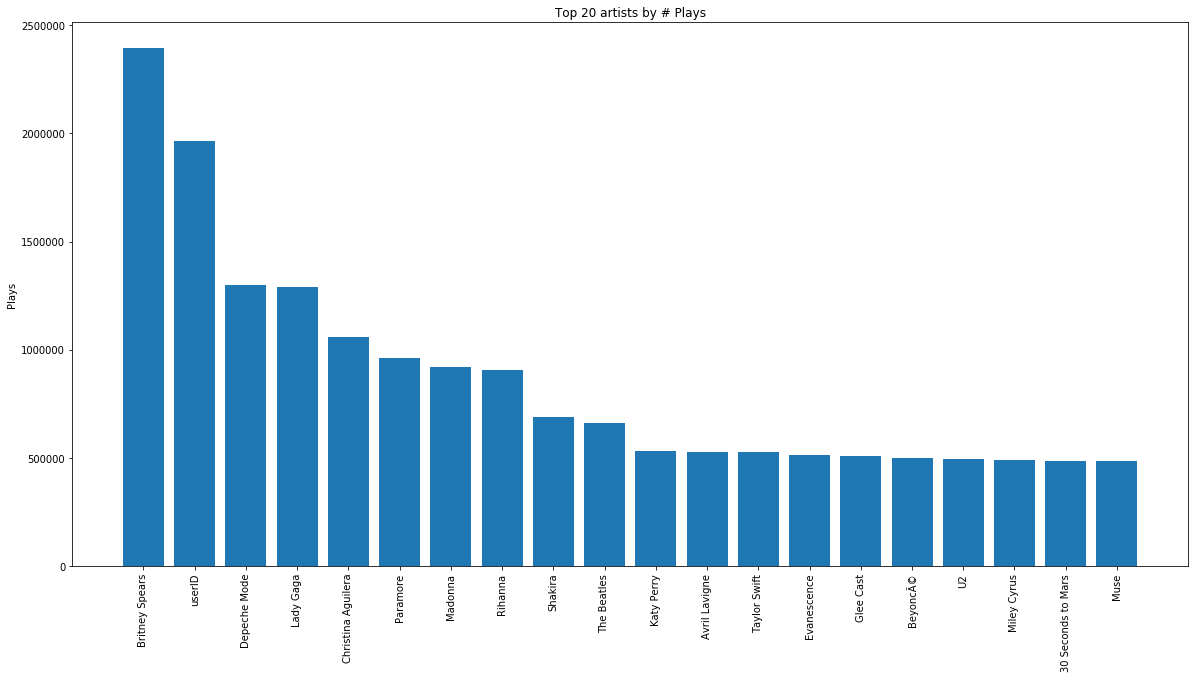

In [17]:
plt.figure(figsize=(20,10))
plt.bar(top_20.index, top_20['plays'])
plt.ylabel('Plays')
plt.xticks(top_20.index, rotation='vertical')
plt.title('Top 20 artists by # Plays')

## Using Cosine Similarity as distance metric

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [142]:
artists = pd.DataFrame(users_artists_piv.columns)

In [143]:
users_artists_piv.head()

name,index,userID,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
df2=users_artists_piv.drop('userID', axis=1)
df2.shape
#1,892 users and 17,632 artists

(1892, 12252)

In [145]:
distance_matrix = cosine_similarity(df2.T)
distance_matrix.shape

(12252, 12252)

In [146]:
distDF = pd.DataFrame(distance_matrix, columns=(df2.columns), index=(df2.columns))
distDF.head()

name,index,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
name,,,,,,,,,,,,,,,,,,,,,
index,1.000000,0.030698,0.028959,0.034885,0.022136,0.032277,0.066491,0.073113,0.050903,0.011454,...,0.018687,0.00809,0.036683,0.001516,0.036656,0.036656,0.036656,0.036656,0.036656,0.036656
!!!,0.030698,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
!DISTAIN,0.028959,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"""Weird Al"" Yankovic",0.034885,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
#####,0.022136,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [147]:
distDF['Nicki Minaj'].sort_values(ascending = False)[0:21]

name
Nicki Minaj                                 1.000000
Shania Twain                                0.470946
Reese Witherspoon                           0.467139
The Nitty Gritty Dirt Band                  0.467139
Joaquin Phoenix & Reese Witherspoon         0.449339
Dev                                         0.410243
Drake                                       0.389431
Katy Perry                                  0.383021
Gwen Stefani                                0.375907
Jerry Reed                                  0.375602
Christina Aguilera, Lil' Kim, Mya & Pink    0.375262
Christina Aguilera a dÃºo con Luis Fonsi    0.375262
Andre 3000                                  0.375179
Young Money                                 0.371997
Josh Farro                                  0.352394
Chris Brown                                 0.351569
Example                                     0.344657
Tinie Tempah                                0.343748
Professor Green                          

## Creating a Binary Dataset

In [11]:
users_artists_piv.head()

name,userID,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
binary = users_artists_piv.copy(deep=True)
binary.index = binary['userID']

In [13]:
binary = binary.drop('userID', axis =1)

In [14]:
binary[binary>=1]=1

In [15]:
binary = binary.reset_index()

In [153]:
binary.head()

name,userID,index,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df2_binary=binary.drop('userID', axis=1)
df2_binary.shape
#1,892 users and 17,632 artists

(1892, 12251)

In [19]:
distance_matrix_binary = cosine_similarity(df2_binary.T)
distance_matrix_binary.shape

(12251, 12251)

In [21]:
distDF_binary = pd.DataFrame(distance_matrix_binary, columns=(df2_binary.columns), index=(df2_binary.columns))
distDF_binary.head()

name,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,-OZ-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
name,,,,,,,,,,,,,,,,,,,,,
!!!,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Weird Al"" Yankovic",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$lick,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
distDF_binary_idx = distDF_binary.reset_index()

In [42]:
distDF_binary_idx.head()

name,name,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,!!!,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,!DISTAIN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""Weird Al"" Yankovic",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#####,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,$lick,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
artists_and_top_10 = pd.DataFrame(columns=list(range(0,11)))

In [78]:
artists_and_top_10.columns = ['Artist',1,2,3,4,5,6,7,8,9,10]

In [81]:
artists_and_top_10.to_csv('top_10_matrix.csv')

In [73]:
for idx, row in distDF_binary_idx.iterrows():
    artists = []
    artists.append(row['name'])
    top_10 = row[1:].sort_values(ascending=False)[1:11]
    for artist, dist in top_10.iteritems():
        artists.append(artist)
    artists_and_top_10.loc[idx] = pd.Series(artists)

In [162]:
distDF_binary['Avril Lavigne'].sort_values(ascending = False)[0:21]

name
Avril Lavigne         1.000000
Katy Perry            0.670993
Britney Spears        0.638724
Rihanna               0.629935
Ke$ha                 0.607421
Miley Cyrus           0.605195
Christina Aguilera    0.597131
Lady Gaga             0.592356
P!nk                  0.560805
BeyoncÃ©              0.557908
Taylor Swift          0.545282
Ashley Tisdale        0.544487
Shakira               0.534652
Kelly Clarkson        0.534513
Paramore              0.534444
Black Eyed Peas       0.491511
The Pussycat Dolls    0.478014
Glee Cast             0.474814
index                 0.469594
Kylie Minogue         0.459556
Jennifer Lopez        0.457291
Name: Avril Lavigne, dtype: float64

In [161]:
distDF_binary.to_csv('binary_cosine_matrix.csv')

In [129]:
# from sqlalchemy import create_engine
# engine = create_engine('sqlite://', echo=False)

## KNN

In [37]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=distDF.shape[0])
model.fit(distDF)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=17103, p=2,
         radius=1.0)

In [38]:
nearest_neighbours = model.kneighbors(distDF, return_distance=True)

In [39]:
#distance
knn_distances = pd.DataFrame(nearest_neighbours[0], index = distDF.index, columns = distDF.columns)
knn_distances.head(20)

name,!!!,!DISTAIN,!deladap,"""Weird Al"" Yankovic",#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(hed) Planet Earth,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
name,,,,,,,,,,,,,,,,,,,,,
!!!,1.192093e-07,1.658380e-01,2.075003e-01,2.075003e-01,2.075003e-01,2.075003e-01,2.075003e-01,2.075003e-01,2.075003e-01,2.075003e-01,...,9.213098,9.213098,9.213098,9.213098,9.213098,9.213098,9.213098,9.213098,9.213098,9.213099
!DISTAIN,0.000000e+00,2.040594e+00,2.040594e+00,2.040594e+00,2.040594e+00,2.040594e+00,2.040594e+00,2.040594e+00,2.040594e+00,2.040594e+00,...,8.636438,8.636438,8.636438,8.636438,8.636438,8.636438,8.636438,8.636438,8.636438,8.636439
!deladap,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.535953,8.535953,8.535953,8.535953,8.535953,8.535953,8.535953,8.535953,8.535953,8.535955
"""Weird Al"" Yankovic",1.460010e-07,2.669238e+00,2.669238e+00,2.669238e+00,2.669238e+00,2.669238e+00,2.669238e+00,2.669238e+00,2.669238e+00,2.669550e+00,...,8.514155,8.514155,8.514155,8.514155,8.514155,8.514155,8.514155,8.514155,8.514155,8.514157
#####,0.000000e+00,1.803690e+00,2.073288e+00,2.382791e+00,2.428270e+00,2.448798e+00,2.508405e+00,2.902986e+00,2.914444e+00,2.914444e+00,...,8.174279,8.174279,8.174279,8.174279,8.174279,8.174279,8.174279,8.174279,8.174279,8.174280
#2 Orchestra,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.444603,8.444603,8.444603,8.444603,8.444603,8.444603,8.444603,8.444603,8.444603,8.444605
$lick,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,7.807154,7.807154,7.807154,7.807154,7.807154,7.807154,7.807154,7.807154,7.807154,7.807155
$lick feat. Six-Fo,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,7.807154,7.807154,7.807154,7.807154,7.807154,7.807154,7.807154,7.807154,7.807154,7.807155
(1962-1966),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.490087e+00,1.914101e+00,2.503145e+00,2.503145e+00,2.503145e+00,2.503145e+00,...,7.377813,7.377813,7.377813,7.377813,7.377813,7.377813,7.377813,7.377813,7.377813,7.377814


In [45]:
knn_distances['Katy Perry'].sort_values(ascending = False)[0:21]

name
DICKY DIXON LAKE RECORDS                         7.944744
The Perrys                                       7.944743
Brian Free & Assurance                           7.944743
talley trio                                      7.944743
Russ Taff                                        7.944743
Kemper Crabb                                     7.944743
The Hoppers                                      7.944743
Kelly Willard                                    7.944743
The Crabb Family                                 7.944743
The Chuck Wagon Gang                             7.944743
The Cathedrals                                   7.944743
The Benedicte Monks of Santo Domingo de Silos    7.944743
Joel Rosenberger                                 7.944743
Joe Wise                                         7.944743
Jessy Dixon                                      7.944743
Carolyn Arends                                   7.944743
Gold City                                        7.944743
Greater V

In [43]:
#index
pd.DataFrame(nearest_neighbours[1])

,0,1,2,3,4,5,6,7,8,9,...,17093,17094,17095,17096,17097,17098,17099,17100,17101,17102
0,0,13236,1089,11360,6985,3396,11141,11096,13326,7548,...,3701,16346,4792,6700,3672,5746,3989,9993,12246,3401
1,1,13353,4720,15316,9005,1747,10884,3602,7133,3175,...,7183,7083,2596,6700,13677,13780,13793,14085,16346,3401
2,12446,12757,9556,200,12447,13893,9626,12049,3173,12636,...,7183,7083,2596,6700,13677,13780,13793,14085,16346,3401
3,3,7185,14070,7761,7116,3118,5889,6945,12076,9152,...,7183,7083,2596,6700,13677,13780,13793,14085,16346,3401
4,4,765,6907,12237,12054,13087,16706,6523,14273,11876,...,4726,4792,5202,5328,5746,5849,5955,6700,4187,3401
5,15911,16081,8975,16226,10399,10411,16270,9916,12786,2493,...,3989,10646,4187,4200,14323,9993,9892,15616,11741,3401
6,4673,118,7649,4203,11963,4671,6,7,12615,1439,...,7183,7083,2596,6700,13677,13780,13793,14085,16346,3401
7,4673,118,7649,4203,11963,4671,6,7,12615,1439,...,7183,7083,2596,6700,13677,13780,13793,14085,16346,3401
8,7737,1136,8,15164,2076,1178,9167,1961,10391,10602,...,7183,7083,2596,6700,13677,13780,13793,14085,16346,3401
9,9,15826,15633,11014,2341,2321,3148,9999,1254,844,...,7183,7083,2596,6700,13677,13780,13793,14085,16346,3401


In [26]:
NNDF = pd.DataFrame(distDF.columns[nearest_neighbours[1]], index=distDF.index)
top10=NNDF[NNDF.columns[1:11]]
top10

AssertionError: Number of Block dimensions (3) must equal number of axes (2)

## KNN

In [21]:
from sklearn.neighbors import NearestNeighbors

#Create a model with all neighbors
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(distDF)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [ ]:
query_index = np.random.choice()

In [ ]:
# nearest_neighbours= model.kneighbors(distDF, return_distance=True)

In [ ]:
# NNDF = pd.DataFrame(distDF.columns[nearest_neighbours[1]], index=distDF.index)
# top10=NNDF[NNDF.columns[1:11]]
# top10

## KNN v2

In [22]:
artists_users_piv = users_artists.pivot(index = 'name', columns = 'userID', values = 'plays').fillna(0)
artists_users_piv.head()

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
name,,,,,,,,,,,,,,,,,,,,,
!!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!deladap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Weird Al"" Yankovic",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from scipy.sparse import csr_matrix
artists_users_matrix = csr_matrix(artists_users_piv.values)

In [25]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(artists_users_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [26]:
artists_users_piv.shape
#17,632 artists and 1,892 users

(17632, 1892)

In [31]:
query_index = np.random.choice(artists_users_piv.shape[0])
distances, indices = model_knn.kneighbors(np.array(artists_users_piv.iloc[query_index, :]).reshape(1, -1), n_neighbors = 6)

array([[  633, 16992,  9440,  5665,  4936,   634]])